In [0]:
#to load mnist data
from tensorflow.keras.datasets import mnist

#to load numpy package
import numpy as np 

#to plot data
import matplotlib.pyplot as plt

#network architecture
from tensorflow.keras.models import Model, Sequential, load_model
#OR tensorflow.keras import models + network = models.Sequential() 
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Dense, Activation
# OR from tensorflow.keras import layers + network.add(layers.Dense(...))

#to prep labels into one-hot-vectors
from tensorflow.keras.utils import to_categorical

#used during model training
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.optimizers import Adam
import scipy as sp
import pandas as pd
import sklearn

In [0]:
def print_model_layers(model):
  """This formats and prints the layers of the model in a table
     
     'Layer # 	 input_# 		 (None, 28, 28, 1) 	 (None, 28, 28, 1)'
  """
  for i, layer in enumerate(model.layers):
    print("Layer", i, "\t", layer.name, "\t\t", layer.input_shape, "\t", layer.output_shape)

In [0]:
#loads the MNIST data
#the model will learn from the training set
#the model will be tested on the test set
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [4]:
#Prints shape of the data
print("ORIGINAL train_images shape: ", train_images.shape)
print("ORIGINAL train_labels shape: ", train_labels.shape)
print('')
print("ORIGINAL test_images shape: ", test_images.shape)
print("ORIGINAL test_labels shape: ", test_labels.shape)

ORIGINAL train_images shape:  (60000, 28, 28)
ORIGINAL train_labels shape:  (60000,)

ORIGINAL test_images shape:  (10000, 28, 28)
ORIGINAL test_labels shape:  (10000,)


In [5]:
#passes the training data to the to_categorical function
#which converts into one_hot_vectors
#For example, it is basically its converting the number 3 into [0,0,0,1,0,0,0,0,0,0] 
train_labelnew = to_categorical(train_labels)
train_labelnew.shape
print("Training Images in Numerical Form: ", train_labels[2])
print("Training Images in One-hot-vector: ", train_labelnew[2])
test_labelnew = to_categorical(test_labels)
test_labelnew.shape
print('')
print("Testing Images in Numerical Form: ", test_labels[2])
print("Testing Images in One-hot-vector: ", test_labelnew[2])

Training Images in Numerical Form:  4
Training Images in One-hot-vector:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Testing Images in Numerical Form:  1
Testing Images in One-hot-vector:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
#reshaping input data, need to add one b/c MNIST is in grayscale, #channels=1
reshaped_train_images = train_images.reshape(train_images.shape+(1,))
reshaped_test_images = test_images.reshape(test_images.shape+(1,))
print(reshaped_train_images.shape)
print(reshaped_test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
#Prints shape of the data
print("NEW reshaped_train_images shape: ", reshaped_train_images.shape)
print("NEW reshaped_train_labels shape: ", train_labelnew.shape)
print('')
print("NEW reshaped_test_images shape: ", reshaped_test_images.shape)
print("NEW reshaped_labels shape: ", test_labelnew.shape)

NEW reshaped_train_images shape:  (60000, 28, 28, 1)
NEW reshaped_train_labels shape:  (60000, 10)

NEW reshaped_test_images shape:  (10000, 28, 28, 1)
NEW reshaped_labels shape:  (10000, 10)


In [0]:
# NOT SURE WHAT ALL THIS DOES
# act='relu'
# dr=0.2
# #16 diff instances of 16 diff kernels, for each 1 diff feature map
# filters=16
# ksize=(3,3)
# psize=(2,2)
# dunits=128

# #layers
# l0 = Input(shape=(28,28,1))
# l1 = Dropout(dr)(Activation(act)(BatchNormalization()(Conv2D(filters=filters,kernel_size=ksize)(l0))))
# l2 = Dropout(dr)(Activation(act)(BatchNormalization()(Conv2D(filters=filters,kernel_size=ksize)(l1))))
# l3 = MaxPool2D(pool_size=psize)(l2)
# l4 = Dropout(dr)(Activation(act)(BatchNormalization()(Conv2D(filters=2*filters,kernel_size=ksize)(l3))))
# l5 = Dropout(dr)(Activation(act)(BatchNormalization()(Conv2D(filters=2*filters,kernel_size=ksize)(l4))))
# l6 = MaxPool2D(pool_size=psize)(l5)
# l7 = Dropout(dr)(Activation(act)(BatchNormalization()(Conv2D(filters=4*filters,kernel_size=ksize)(l6))))
# l8 = Flatten()(l7)
# l9 = Dropout(dr)(Activation(act)(BatchNormalization()(Dense(units=dunits)(l8))))
# l10 = Dropout(dr)(Activation(act)(BatchNormalization()(Dense(units=dunits)(l9))))
# l11 = Activation('softmax')(Dense(units=10)(l10))

# 1) Rewrite the network architecture with your own layers. Fuctions, use at least:
# 	-input
# 	-Conv2D
# 		(Conv2D(filters=filters,kernel_size=ksize,activation='relu')(10)
# 	-MaxPool2D
# 		-one maxpool every 2 convolutions
# 	-flatten
# 		similar to "train_images = train_images.reshape((60000, 28*28))
# 	-dense

#code here


















#building the model
#network = Model(inputs=[first],outputs=[last])
network = Model(inputs=[l0],outputs=[l11])

#Compilation Step
network.compile(optimizer = Adam(lr=1e-3),
                loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [9]:
print(reshaped_train_images.shape)
print(reshaped_train_images.dtype)
print(reshaped_train_images.max())

(60000, 28, 28, 1)
uint8
255


In [0]:
#Callbacks 
call1 = ModelCheckpoint(filepath='best_model.hdf5',monitor='val_loss',save_best_only=True)
call2 = EarlyStopping(monitor='val_loss', patience=10)
callbacks=[call1,call2]

TRAINING

In [17]:
#Ready to Train the Network Step
#in Keras, to train network, is done via a call
#to the networks 'fit' method (namely, to fit the 
#model to its training data)
#2 values will be displayed during training;
# 1)the loss of the network over training data
# 2)the accuracy of the network over the training data
loss=network.fit(reshaped_train_images, train_labelnew, epochs = 50, batch_size = 64, validation_split=0.2,callbacks=callbacks)
print('')

#Check How the Model Performs on Test Set
#if the test set accuracy is lower than the training
#set accuracy, the gap is an ex of OVERFITTING
#(this is when a ML models tend to perform worse
#on new data than on the training data)
network = load_model('best_model.hdf5')#model that performed best
test_loss, test_acc = network.evaluate(reshaped_test_images, test_labelnew)
print('test_acc: ', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 18s 371us/sample - loss: 0.0407 - acc: 0.9872 - val_loss: 0.0483 - val_acc: 0.9856
Epoch 2/50
48000/48000 [==============================] - 16s 340us/sample - loss: 0.0254 - acc: 0.9916 - val_loss: 0.0443 - val_acc: 0.9872
Epoch 3/50
48000/48000 [==============================] - 16s 340us/sample - loss: 0.0233 - acc: 0.9926 - val_loss: 0.0423 - val_acc: 0.9888
Epoch 4/50
48000/48000 [==============================] - 16s 338us/sample - loss: 0.0246 - acc: 0.9926 - val_loss: 0.0284 - val_acc: 0.9914
Epoch 5/50
48000/48000 [==============================] - 16s 336us/sample - loss: 0.0211 - acc: 0.9930 - val_loss: 0.0287 - val_acc: 0.9912
Epoch 6/50
48000/48000 [==============================] - 16s 334us/sample - loss: 0.0201 - acc: 0.9936 - val_loss: 0.0350 - val_acc: 0.9910
Epoch 7/50
48000/48000 [==============================] - 23s 484us/sample - loss: 0.0193 - acc: 0.9935 

In [18]:
#print model
print_model_layers(network)

Layer 0 	 input_1 		 (None, 28, 28, 1) 	 (None, 28, 28, 1)
Layer 1 	 conv2d 		 (None, 28, 28, 1) 	 (None, 26, 26, 16)
Layer 2 	 batch_normalization_v1 		 (None, 26, 26, 16) 	 (None, 26, 26, 16)
Layer 3 	 activation 		 (None, 26, 26, 16) 	 (None, 26, 26, 16)
Layer 4 	 dropout 		 (None, 26, 26, 16) 	 (None, 26, 26, 16)
Layer 5 	 conv2d_1 		 (None, 26, 26, 16) 	 (None, 24, 24, 16)
Layer 6 	 batch_normalization_v1_1 		 (None, 24, 24, 16) 	 (None, 24, 24, 16)
Layer 7 	 activation_1 		 (None, 24, 24, 16) 	 (None, 24, 24, 16)
Layer 8 	 dropout_1 		 (None, 24, 24, 16) 	 (None, 24, 24, 16)
Layer 9 	 max_pooling2d 		 (None, 24, 24, 16) 	 (None, 12, 12, 16)
Layer 10 	 conv2d_2 		 (None, 12, 12, 16) 	 (None, 10, 10, 32)
Layer 11 	 batch_normalization_v1_2 		 (None, 10, 10, 32) 	 (None, 10, 10, 32)
Layer 12 	 activation_2 		 (None, 10, 10, 32) 	 (None, 10, 10, 32)
Layer 13 	 dropout_2 		 (None, 10, 10, 32) 	 (None, 10, 10, 32)
Layer 14 	 conv2d_3 		 (None, 10, 10, 32) 	 (None, 8, 8, 32)
Layer 15 	 

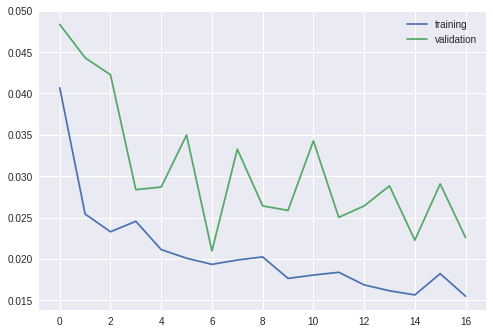

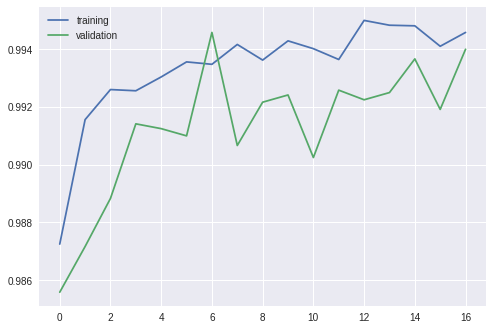

In [20]:
plt.plot(loss.history['loss'],label='training')
plt.plot(loss.history['val_loss'],label='validation')
plt.legend()
plt.show()

plt.plot(loss.history['acc'],label='training')
plt.plot(loss.history['val_acc'],label='validation')
plt.legend()
plt.show()

**PREDICTION**

In [0]:
#new model to predict
prediction = network.predict(reshaped_test_images)

In [22]:
print(prediction.shape)

(10000, 10)
